In [15]:
import os
import shutil
from google.colab import files
import zipfile
import pandas as pd

# Определяем пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

# Загружаем файл
uploaded = files.upload()

# Это загрузит файл kaggle.json
# Вы увидите виджет для загрузки файла

# Теперь можно использовать Kaggle API для загрузки датасета:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

# Распакуйте скачанный архив:
with zipfile.ZipFile('heart-disease-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('heart-disease-dataset')

# Показать файлы в директории
print(os.listdir('heart-disease-dataset'))

# Замените 'heart.csv' на правильное имя файла
df = pd.read_csv('heart-disease-dataset/heart.csv')

# Просматриваем первые несколько строк датасета
print(df.head())

# Получаем общую информацию о датасете
print(df.info())

# Выводим статистические данные о числовых столбцах
print(df.describe())

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
heart-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
['heart.csv']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non

In [ ]:
# 1.Классификатор градиентного бустинга на данных heart.csv бинарная классификация

# Импортируем необходимые библиотеки
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка данных о сердечных заболеваниях
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop ('target',axis =1)
y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Обучение модели на обучающем наборе данных
gb_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = gb_classifier.predict(X_test)

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.95      0.95      0.95       149

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



In [ ]:
# 2. AdaBoost с синтетическими данными
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных о сердечных заболеваниях
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop ('target',axis =1)
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Создание и обучение классификатора AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_classifier.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе данных
y_pred = ada_classifier.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308



In [ ]:
# 3. QDA (Квадратичный дискриминантный анализ)
# Импортируем необходимые библиотеки

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных о сердечных заболеваниях
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop ('target',axis =1)
y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Создание модели QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Обучение модели на обучающем наборе данных
qda_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = qda_classifier.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8155339805825242
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        58
           1       0.73      0.91      0.81        45

    accuracy                           0.82       103
   macro avg       0.82      0.83      0.82       103
weighted avg       0.84      0.82      0.82       103



Лучшее значение k: 1
Accuracy: 0.9902597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



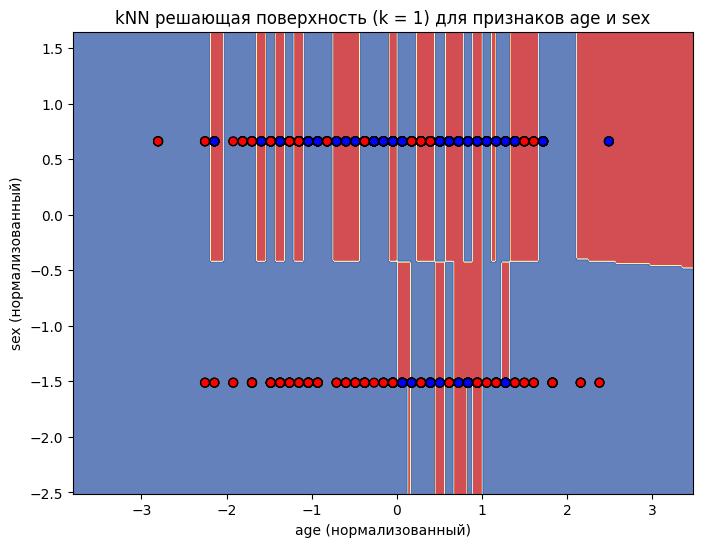

In [ ]:
# 4. KNeighborsClassifier
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных о сердечных заболеваниях
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop ('target',axis =1)
y = df['target']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Настройка гиперпараметра k с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Вывод лучшего значения k
print("Лучшее значение k:", knn_cv.best_params_['n_neighbors'])

# Обучение модели с лучшим значением k
knn_best = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn_best.predict(X_test)

# Вывод метрик
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

# Загрузка данных
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop('target', axis=1)
y = df['target']
# --- Блок визуализации для первых двух признаков (age и sex) ---
# Извлекаем первые два признака из масштабированных обучающих данных
X_train_vis = X_train[:, :2]  # age и sex после нормализации
y_train_vis = y_train

# Обучаем модель kNN с лучшим k только на этих двух признаках
knn_vis = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn_vis.fit(X_train_vis, y_train_vis)

# Строим сетку для визуализации в том же масштабированном пространстве
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Рисуем
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis,
            cmap=plt.cm.bwr, edgecolor='k', s=40)
plt.xlabel('age (нормализованный)')
plt.ylabel('sex (нормализованный)')
plt.title(f'kNN решающая поверхность (k = {knn_cv.best_params_["n_neighbors"]}) для признаков age и sex')
plt.show()


Accuracy: 0.4935064935064935
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48       159
           1       0.48      0.54      0.51       149

    accuracy                           0.49       308
   macro avg       0.50      0.50      0.49       308
weighted avg       0.50      0.49      0.49       308

Confusion Matrix:
[[71 88]
 [68 81]]


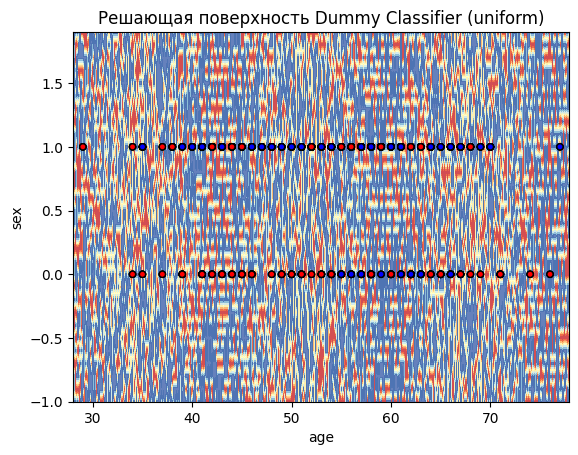

In [ ]:
# 5.Dummy Classifier с параметром uniform
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# # Загрузка данных о сердечных заболеваниях
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop ('target',axis =1)
y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение Dummy Classifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

# Оценка модели
y_pred = dummy_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Визуализация решающей поверхности для первых двух признаков

# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

# Загрузка данных
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop('target', axis=1)
y = df['target']

# Выбираем два признака для визуализации (первые два)
X_vis = X.iloc[:, :2]      # DataFrame с двумя столбцами
y_vis = y                  # целевая переменная

# Обучаем DummyClassifier только на двух признаках
dummy_vis = DummyClassifier(strategy='uniform')
dummy_vis.fit(X_vis, y_vis)

# Создаём сетку для графика
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Предсказываем классы для всех точек сетки
Z = dummy_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Строим график
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap=plt.cm.bwr, s=20, edgecolor='k')
plt.xlabel(X.columns[0])   # или просто 'Признак 1'
plt.ylabel(X.columns[1])   # или 'Признак 2'
plt.title('Решающая поверхность Dummy Classifier (uniform)')
plt.show()

Обучение модели: Gradient Boosting...
Обучение модели: AdaBoost...
Обучение модели: QDA...
Обучение модели: kNN...
Обучение модели: Dummy...

РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ
           Модель  Точность (Accuracy)  Точность (Precision)  Полнота (Recall)  F1-мера
Gradient Boosting               0.9643                0.9623            0.9684   0.9653
         AdaBoost               0.8864                0.8917            0.8861   0.8889
              kNN               0.8669                0.8874            0.8481   0.8673
              QDA               0.8377                0.8418            0.8418   0.8418
            Dummy               0.5357                0.5490            0.5316   0.5402

🏆 ЛУЧШАЯ МОДЕЛЬ: Gradient Boosting
   F1-мера: 0.9653


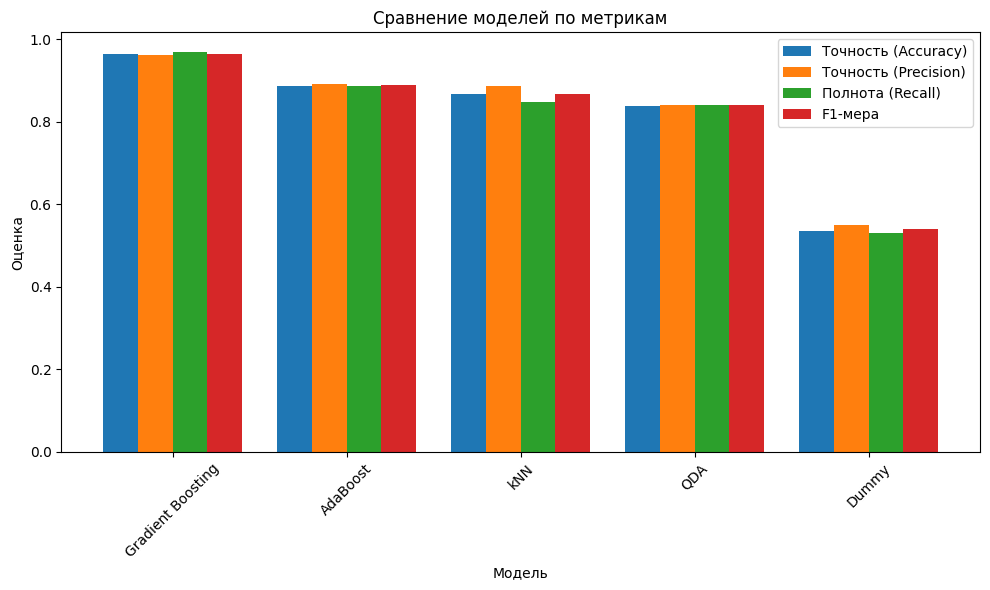

In [14]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Загрузка данных
df = pd.read_csv('heart-disease-dataset/heart.csv')
X = df.drop('target', axis=1)
y = df['target']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Нормализация для kNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем список моделей
models = {
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'QDA': QuadraticDiscriminantAnalysis(),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Dummy': DummyClassifier(strategy='uniform', random_state=42)
}

# Для kNN используем нормализованные данные
scaled_models = ['kNN']

# Таблица для результатов
results = []

# Обучаем и оцениваем каждую модель
for name, model in models.items():
    print(f"Обучение модели: {name}...")

    # Выбор данных (нормализованные или нет)
    if name in scaled_models:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Обучение
    model.fit(X_tr, y_train)

    # Предсказание
    y_pred = model.predict(X_te)

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Сохраняем результаты
    results.append({
        'Модель': name,
        'Точность (Accuracy)': round(accuracy, 4),
        'Точность (Precision)': round(precision, 4),
        'Полнота (Recall)': round(recall, 4),
        'F1-мера': round(f1, 4)
    })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

# Сортируем по F1-мере (от лучшей к худшей)
results_df = results_df.sort_values('F1-мера', ascending=False)

# Выводим результаты
print("\n" + "="*70)
print("РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ")
print("="*70)
print(results_df.to_string(index=False))

# Находим лучшую модель
best_model = results_df.iloc[0]['Модель']
best_f1 = results_df.iloc[0]['F1-мера']

print("\n" + "="*70)
print(f"🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model}")
print(f"   F1-мера: {best_f1}")
print("="*70)

# Простая визуализация (если хотите)
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    metrics = ['Точность (Accuracy)', 'Точность (Precision)', 'Полнота (Recall)', 'F1-мера']

    x = range(len(results_df))
    width = 0.2

    for i, metric in enumerate(metrics):
        values = results_df[metric].values
        plt.bar([pos + i*width for pos in x], values, width=width, label=metric)

    plt.xlabel('Модель')
    plt.ylabel('Оценка')
    plt.title('Сравнение моделей по метрикам')
    plt.xticks([pos + width*1.5 for pos in x], results_df['Модель'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

except:
    print("\n(Для визуализации установите matplotlib: pip install matplotlib)")


In [8]:
import os
import shutil

# Определяем пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

In [9]:
from google.colab import files

# Загружаем файл
uploaded = files.upload()

# Это загрузит файл kaggle.json
# Вы увидите виджет для загрузки файла

Saving kaggle.json to kaggle.json
